<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/LinearRegressionWithTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [16]:
N = 100
X = np.random.random(N) * 6 - 3
y = 0.5 * X - 1 + np.random.random(N) * 0.5

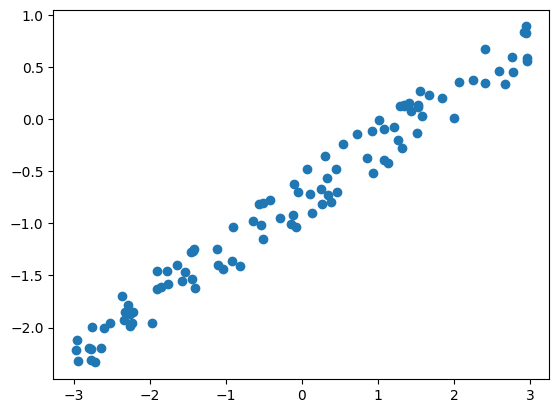

In [17]:
plt.scatter(X, y)

In [18]:
# build model
inputs = Input(shape=(1,))
outputs = Dense(1)(inputs)
model = Model(inputs=inputs, outputs=outputs)

In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
    metrics = ['mae']
)

In [21]:
r = model.fit(
    X.reshape(-1, 1), y,
    epochs = 100,
    batch_size = 32
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4171 - mae: 0.9988  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2372 - mae: 0.3837 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0522 - mae: 0.1883 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2107 - mae: 0.3796 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1757 - mae: 0.3414 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0571 - mae: 0.1957 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0457 - mae: 0.1770 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0856 - mae: 0.2433 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0566 - mae: 0.1867 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0317 - mae: 0.1457 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - mae: 0.1446 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mae: 0.1472 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

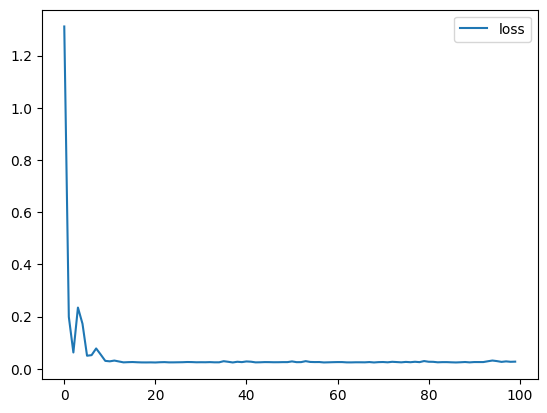

In [22]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.legend()

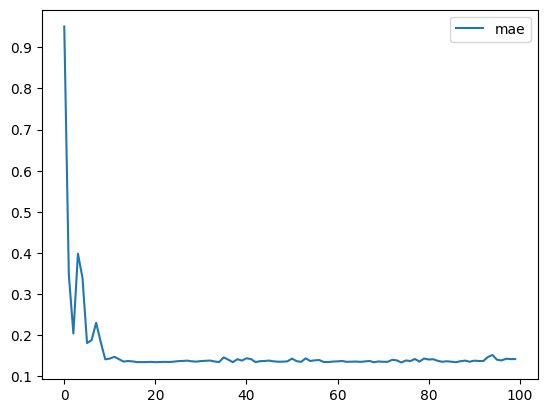

In [23]:
# Plot mae per iteration
plt.plot(r.history['mae'], label='mae')
plt.legend()

In [24]:
# Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


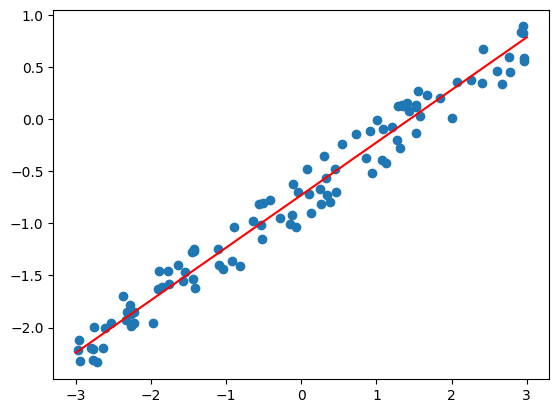

In [25]:
plt.scatter(X, y)
plt.plot(Xtest, ptest, color='red')

In [26]:
# Check the learned parameters
model.layers

[<InputLayer name=input_layer_1, built=True>, <Dense name=dense_1, built=True>]

In [28]:
model.layers[1].get_weights()

[array([[0.5047348]], dtype=float32), array([-0.72731125], dtype=float32)]